<a href="https://colab.research.google.com/github/drshaheed/Covid-19_India/blob/main/Covid_19_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Load the owid-covid-data dataset
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

In [13]:
# Print basic information about the dataset
print(df.head())
print(df.info())

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [14]:
# Check for missing values
print(df.isnull().sum())

iso_code                                        0
continent                                   14454
location                                        0
date                                            0
total_cases                                 35881
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       293939
excess_mortality_cumulative                293939
excess_mortality                           293939
excess_mortality_cumulative_per_million    293939
Length: 67, dtype: int64


In [15]:
# Describe the numerical columns
print(df.describe())

        total_cases     new_cases  new_cases_smoothed  total_deaths  \
count  2.684890e+05  2.957430e+05        2.944790e+05  2.479310e+05   
mean   5.576081e+06  1.094674e+04        1.099127e+04  7.952890e+04   
std    3.493830e+07  1.041787e+05        1.013988e+05  4.115333e+05   
min    1.000000e+00  0.000000e+00        0.000000e+00  1.000000e+00   
25%    6.329000e+03  0.000000e+00        1.143000e+00  1.190000e+02   
50%    6.055700e+04  1.800000e+01        3.957100e+01  1.202000e+03   
75%    6.208530e+05  5.470000e+02        6.492860e+02  1.041800e+04   
max    7.637394e+08  7.460688e+06        6.410718e+06  6.908541e+06   

          new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  295839.000000        294609.000000            268489.000000   
mean       97.627476            98.018766             85145.420991   
std       607.167291           597.863069            135418.021397   
min         0.000000             0.000000                 0.000000   
25%       

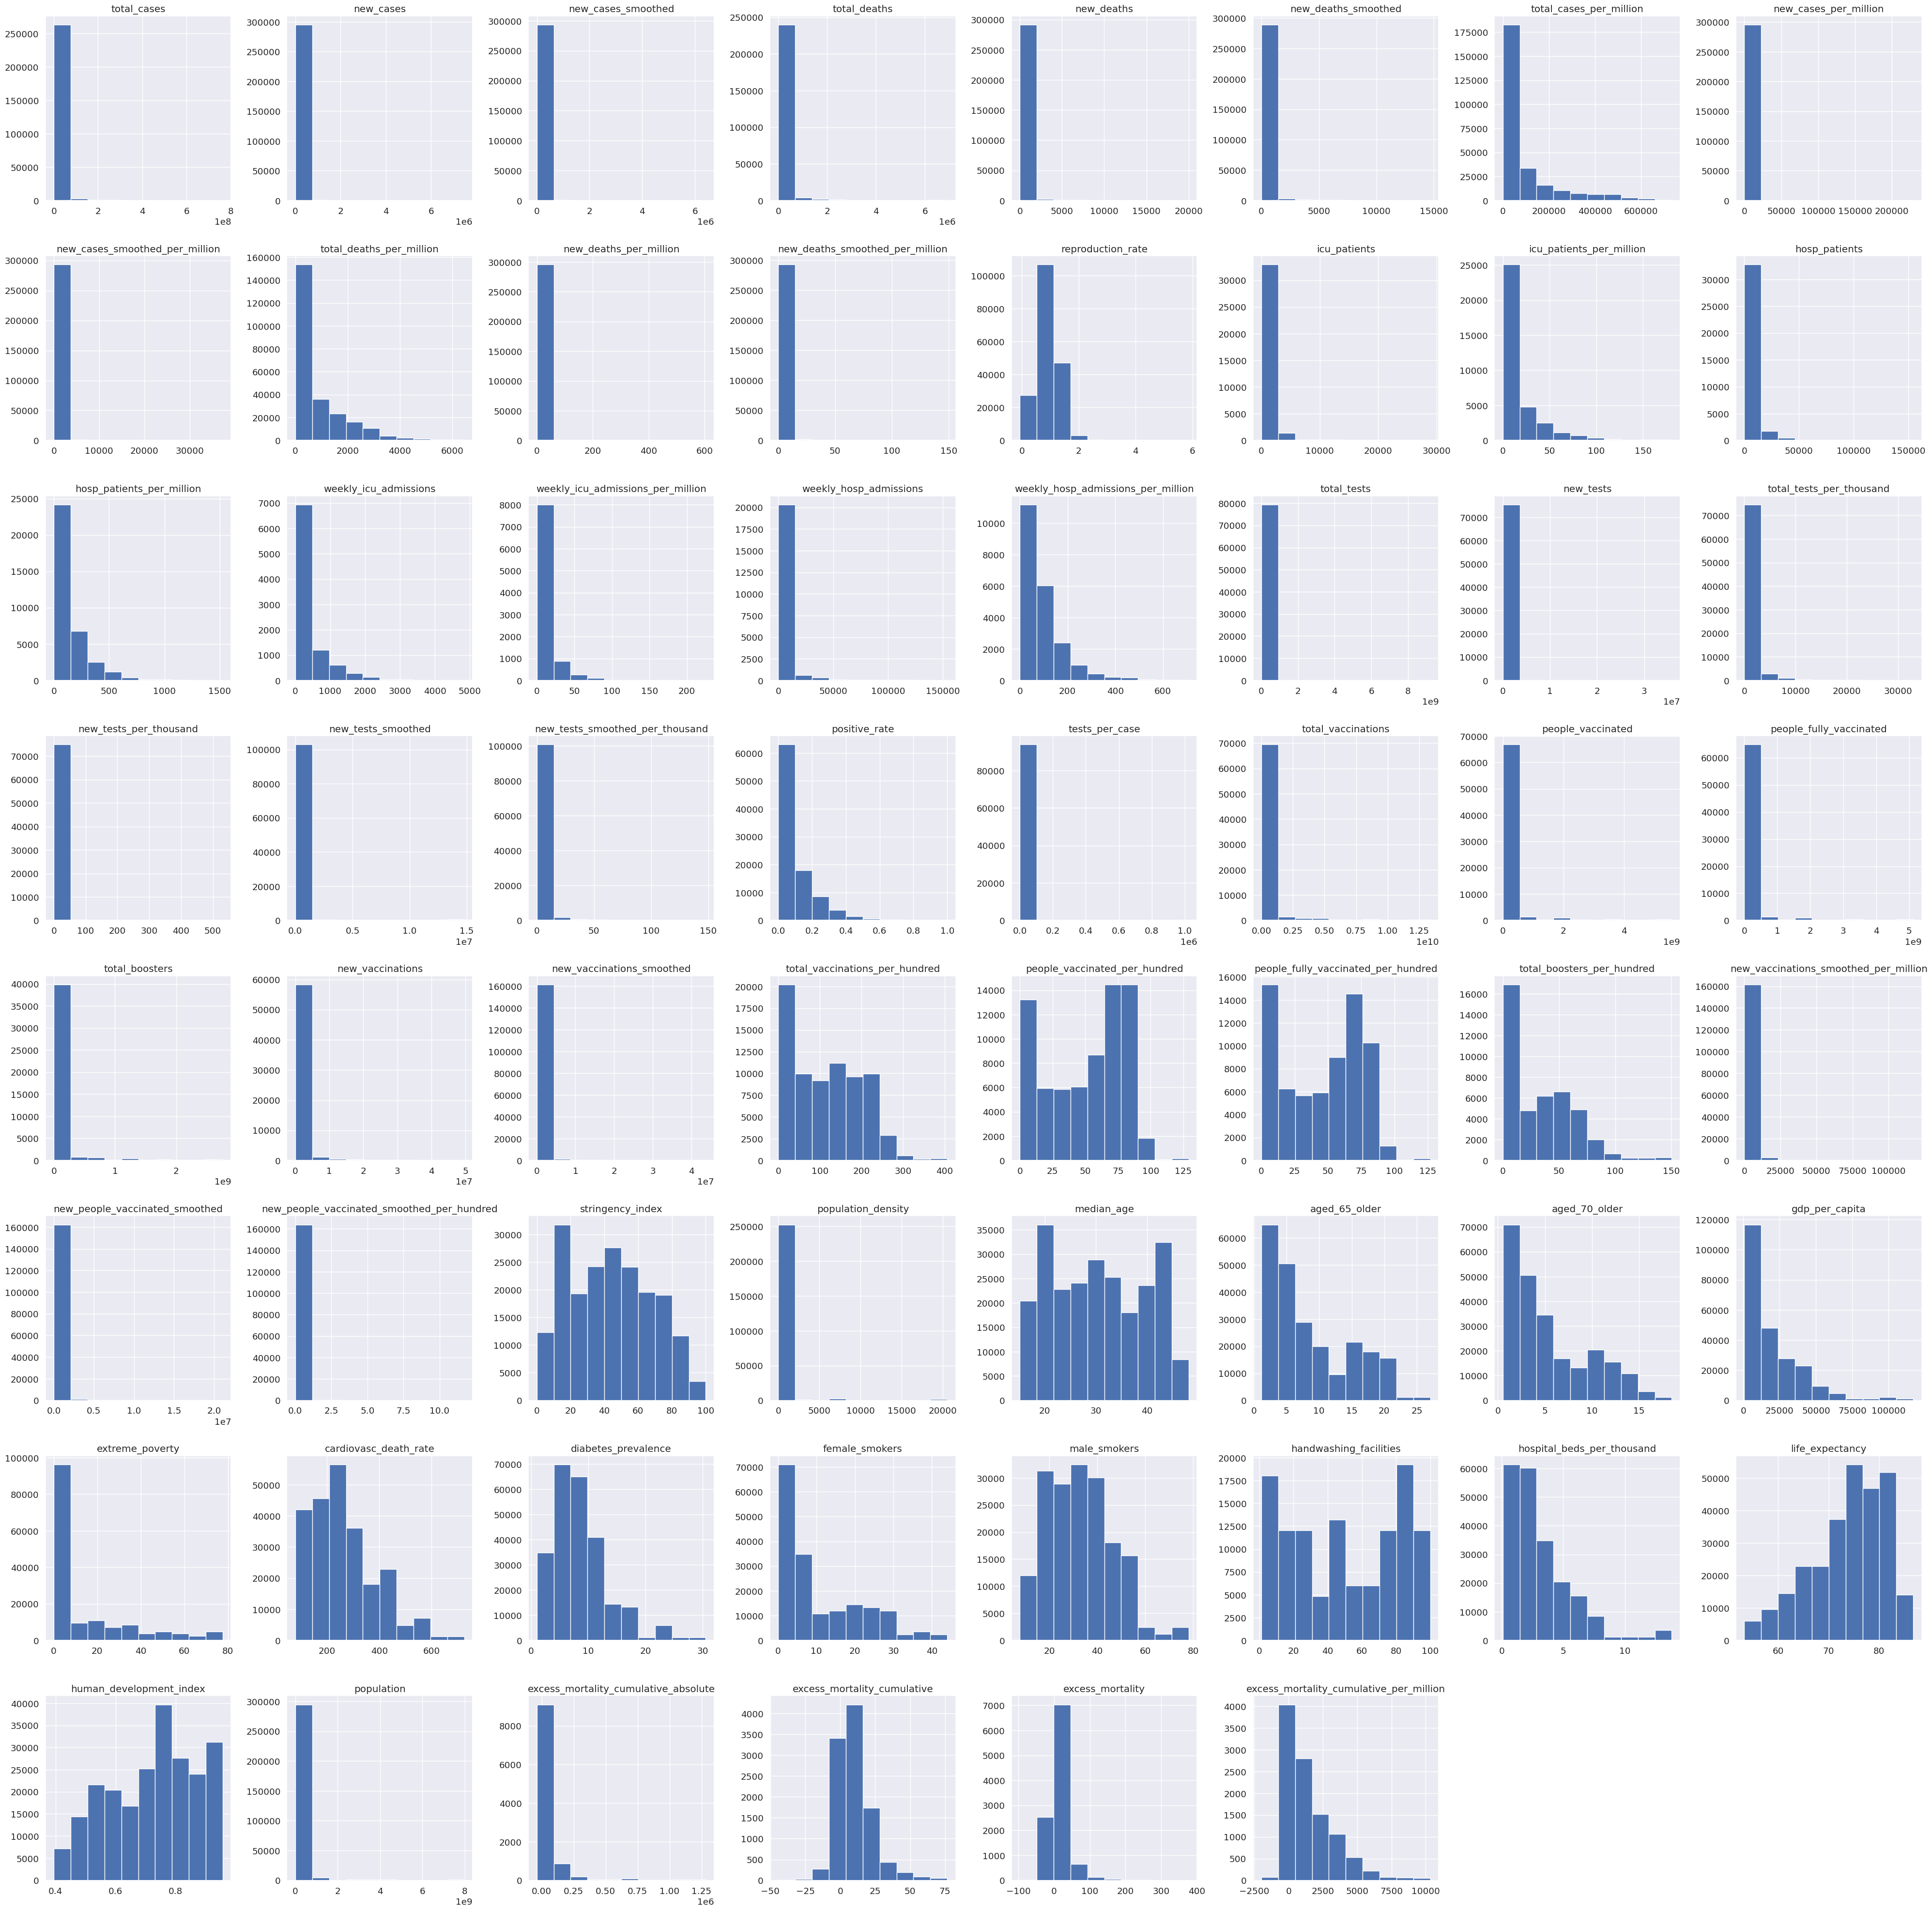

In [24]:
# Plot histograms for the numerical columns
df.hist(figsize=(50, 50))
plt.show()

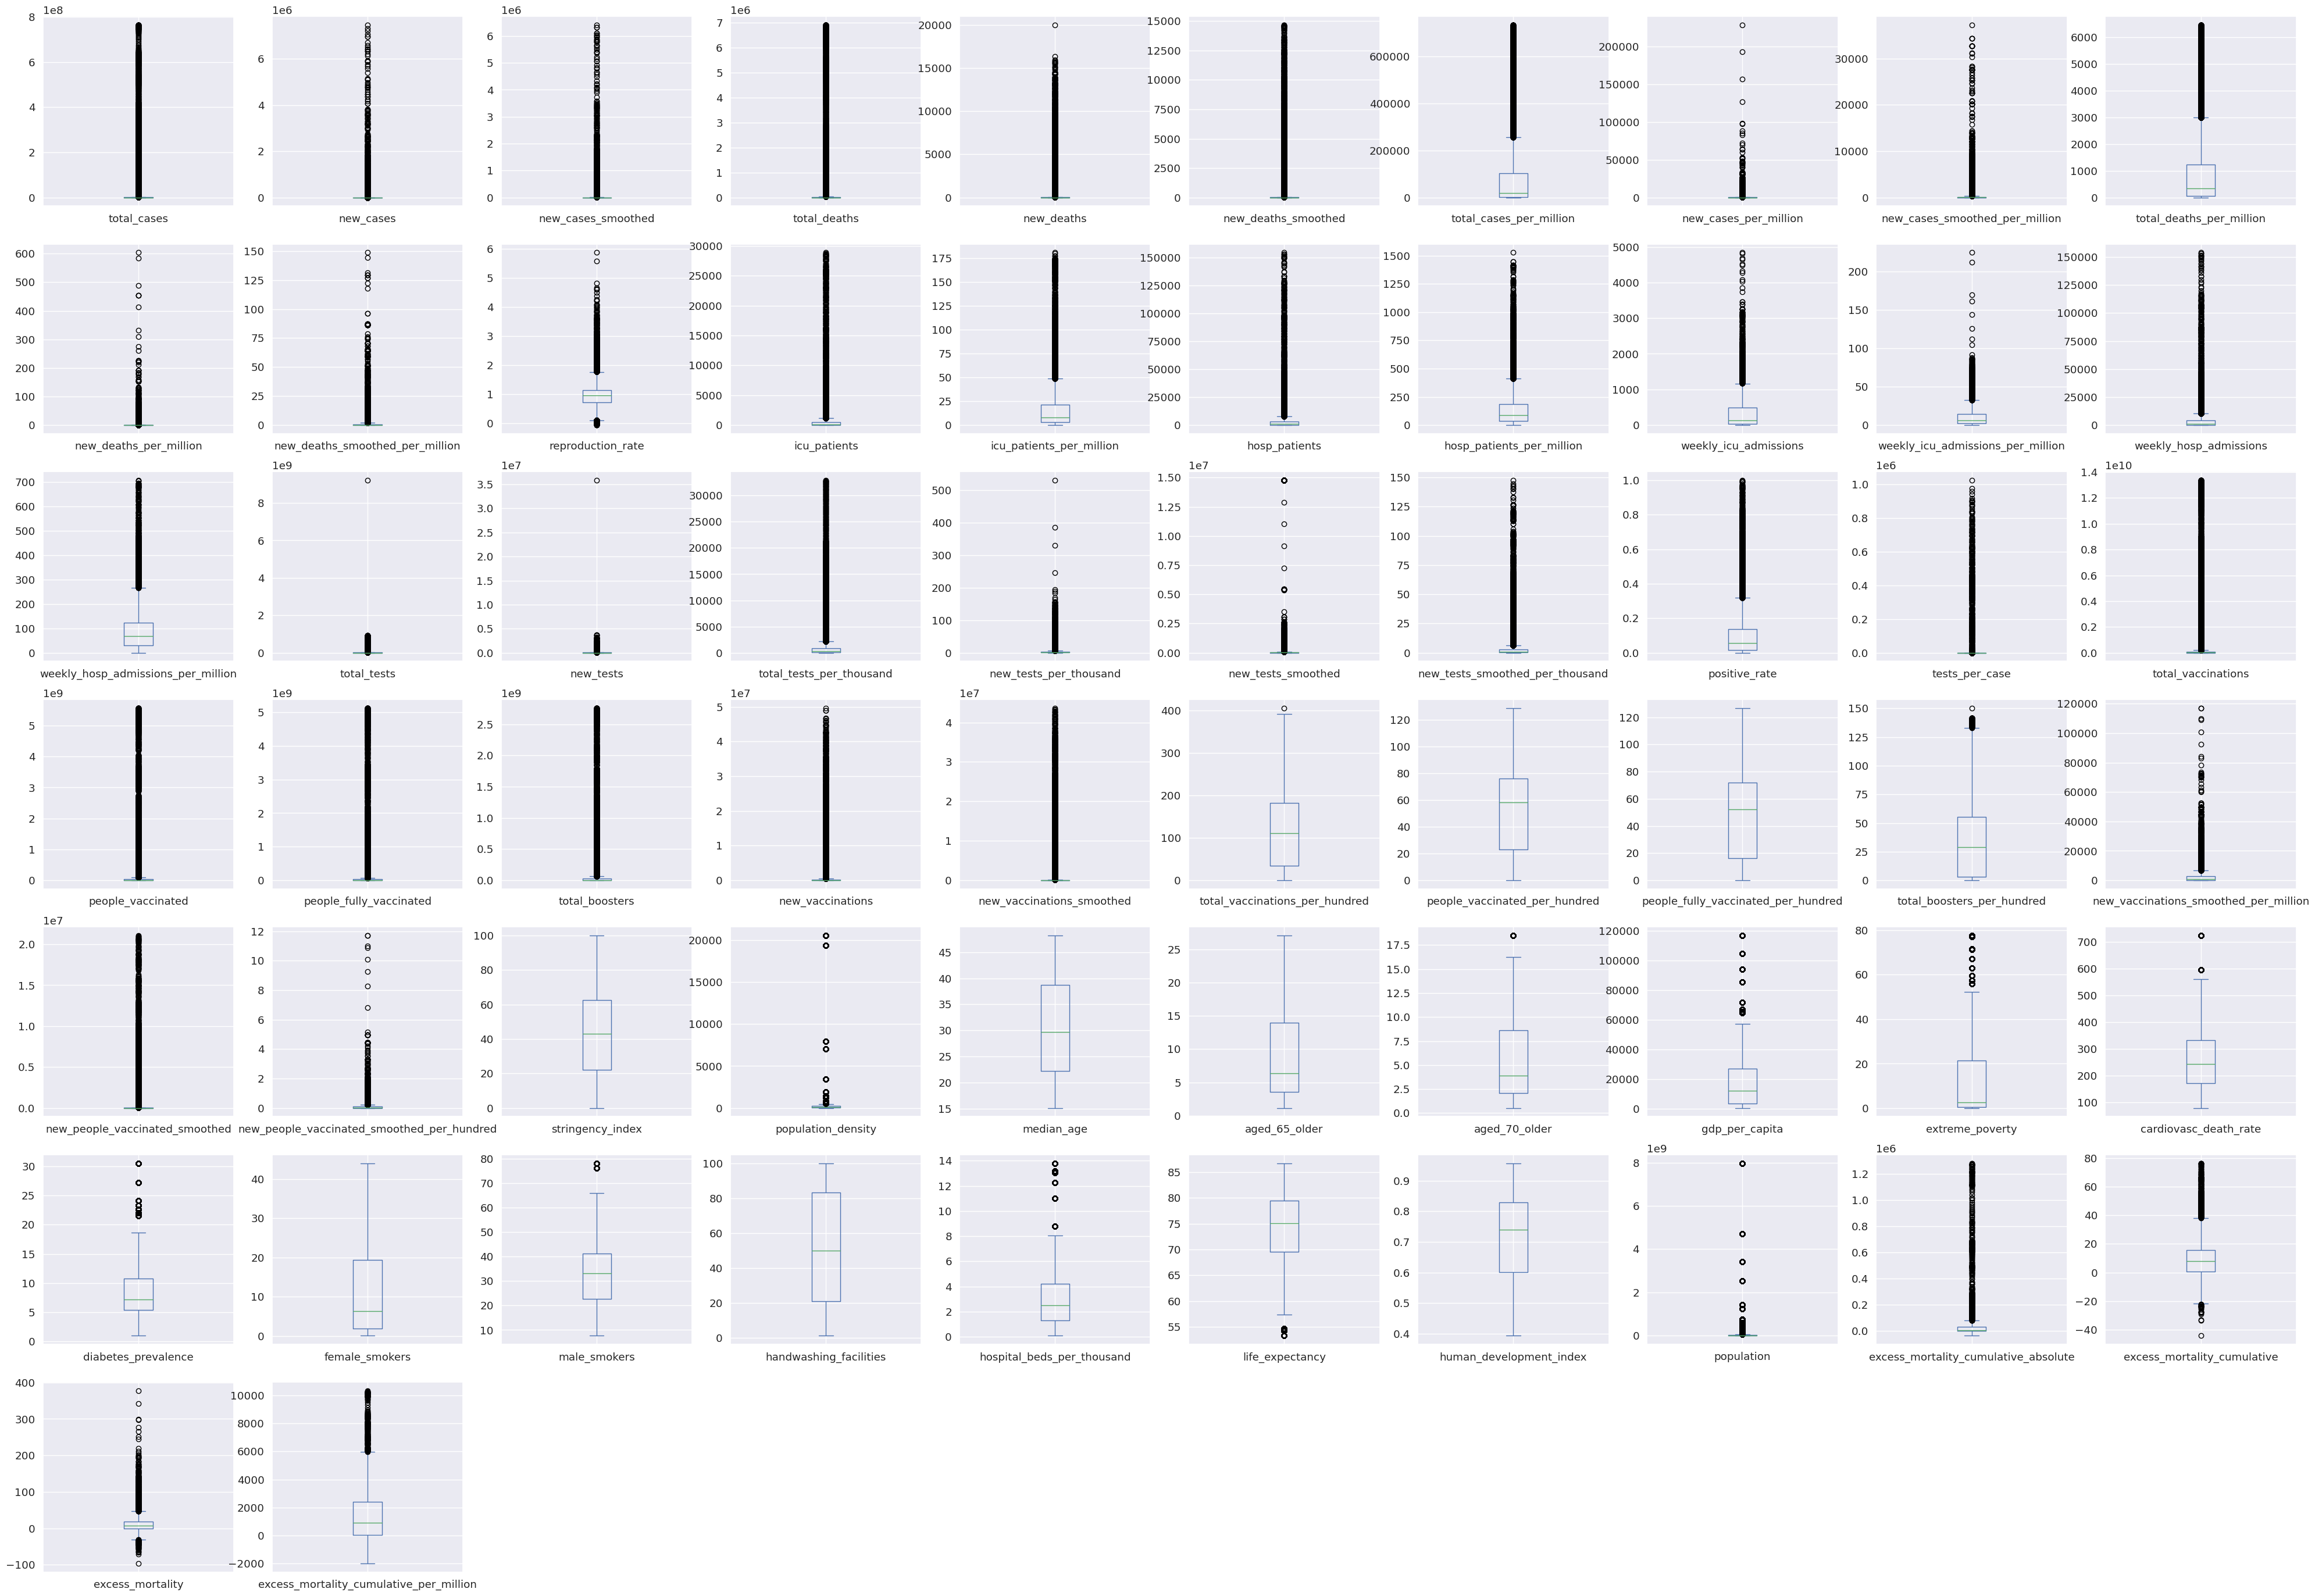

In [27]:
# Plot boxplots for the numerical columns
df.plot(kind='box', subplots=True, layout=(10,10), figsize=(50,50), sharex=False, sharey=False)
plt.show()

In [31]:
 # Plot a correlation matrix for the numerical columns
sns.set(font_scale=1.2)
plt.figure(figsize=(90, 90))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.show()

<ipython-input-31-430060d4edd5>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)


In [33]:
# Convert date column to DatetimeIndex
df['date'] = pd.to_datetime(df['date'])

# Preprocess the data for line chart
monthly_data = df.resample('M', on='date').mean()

<ipython-input-33-73f9e09a1359>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_data = df.resample('M', on='date').mean()


<Axes: xlabel='date', ylabel='new_cases_smoothed'>

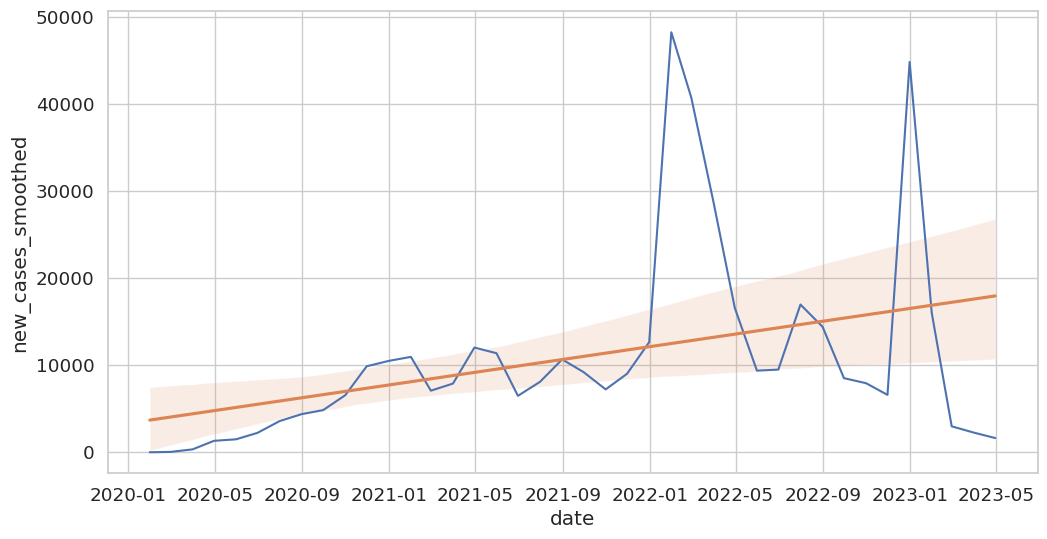

In [36]:
# Plot a line chart with a trendline for new_cases_smoothed column
import matplotlib.dates as mdates
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=monthly_data, x=monthly_data.index, y='new_cases_smoothed', ax=ax)
sns.regplot(data=monthly_data, x=mdates.date2num(monthly_data.index), y='new_cases_smoothed', scatter=False, ax=ax)

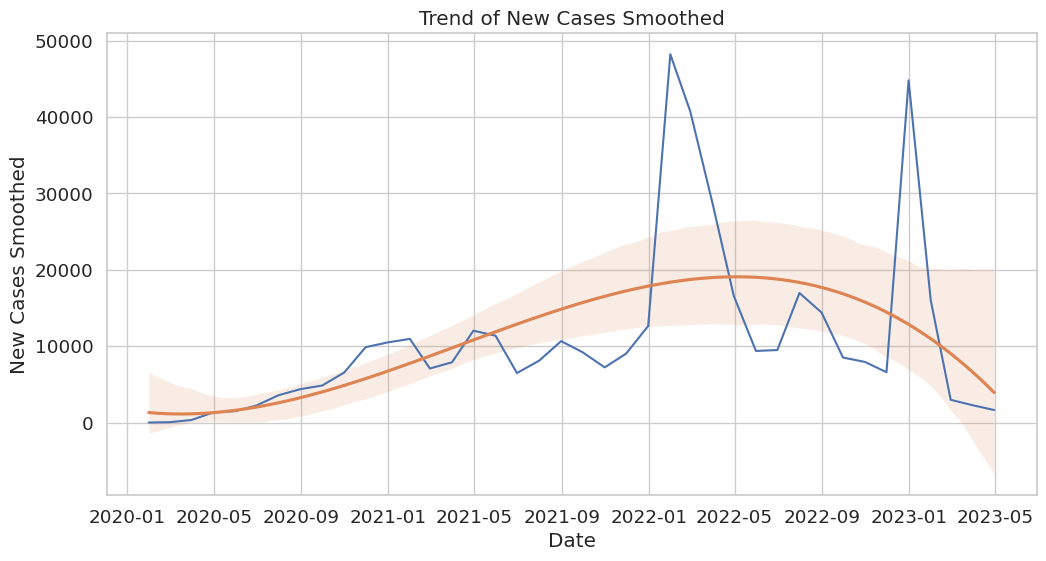

In [41]:
# Plot a line chart with a trendline for new_cases_smoothed column
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=monthly_data, x=monthly_data.index, y='new_cases_smoothed', ax=ax)
sns.regplot(data=monthly_data, x=mdates.date2num(monthly_data.index), y='new_cases_smoothed', scatter=False, ax=ax, order=3)

# Set labels and title for the chart
plt.xlabel('Date')
plt.ylabel('New Cases Smoothed')
plt.title('Trend of New Cases Smoothed')

plt.show()

In [38]:
# Save the figure
plt.savefig('new_cases_smoothed_trend.png')

<Figure size 640x480 with 0 Axes>

In [39]:
# Show the chart
plt.show()

# ANALYSIS FOR INDIA

In [43]:
# Filter the data for India
india_data = df[df['iso_code'] == 'IND']

In [44]:
# Calculate the total cases, total deaths, and case fatality rate
total_cases = india_data['total_cases'].max()
total_deaths = india_data['total_deaths'].max()
case_fatality_rate = total_deaths / total_cases

In [45]:
# Print the information
print(f'Total cases: {total_cases}')
print(f'Total deaths: {total_deaths}')
print(f'Case fatality rate: {case_fatality_rate:.4f}')

Total cases: 44834859.0
Total deaths: 531152.0
Case fatality rate: 0.0118


<ipython-input-53-1fb847e81edc>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_data = india_data.resample('M', on='date').mean()


<Axes: xlabel='date', ylabel='new_cases_smoothed'>

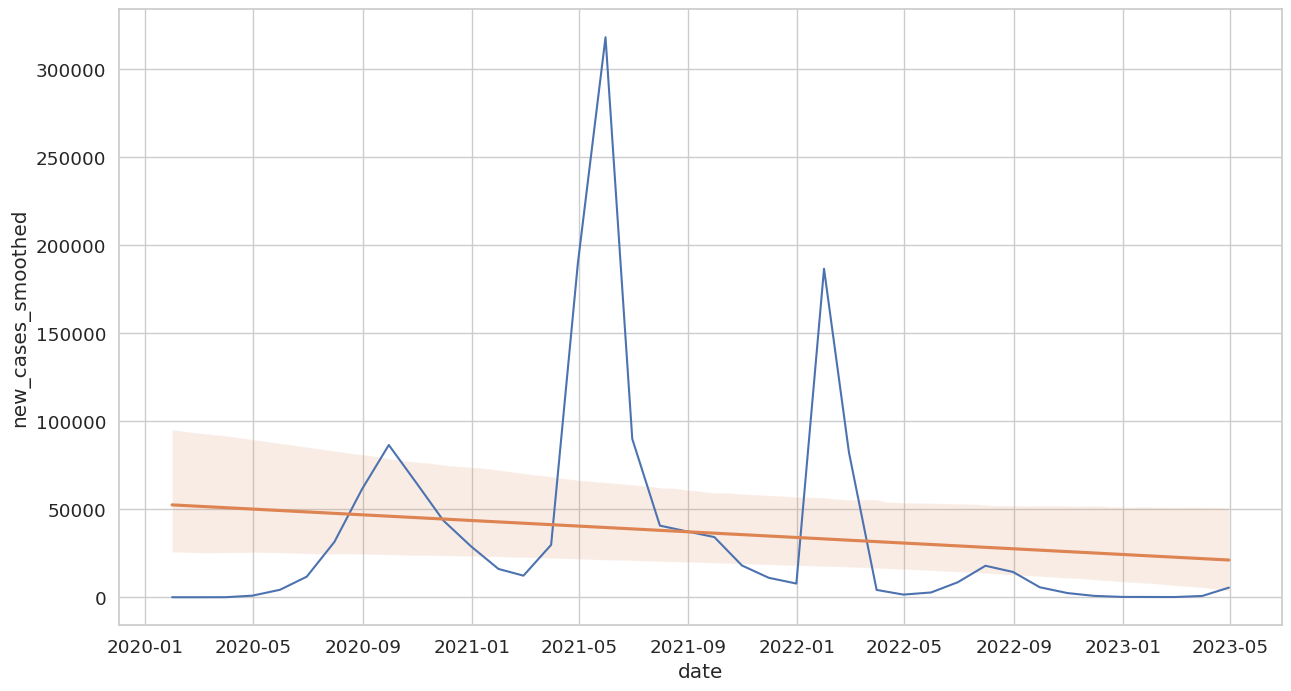

In [53]:
# Plot a line chart with a trendline for new_cases_smoothed column
monthly_data = india_data.resample('M', on='date').mean()
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(data=monthly_data, x=monthly_data.index, y='new_cases_smoothed', ax=ax)
sns.regplot(data=monthly_data, x=mdates.date2num(monthly_data.index), y='new_cases_smoothed', scatter=False, ax=ax)
